<a href="https://colab.research.google.com/github/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/main/DriftDetectionSystem_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intrusion Detection System
Aimed to create a classification model to predict if a connection made is benign or anomal. 

In [199]:
#IMPORTS
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score


In [200]:
#LOADING THE DATASET0 NSL-KDD
train_df = pd.read_csv('https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/main/Train_data.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/main/Test_data.csv')


In [201]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
latest_test_df = pd.read_csv('https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/main/latestTest.csv',header=None,names=columns)

In [237]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [203]:
latest_test_df.attack.value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

## Considering only the train data for EDA and training.

In [204]:
#ROW AND COLUMN DIMENSIONS 
print("Row size = {}, Column size = {}".format(train_df.shape[0],train_df.shape[1]))

Row size = 25192, Column size = 42


In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df.drop("class", axis=1), train_df['class'], test_size=0.3)

In [206]:
#CHECKING FOR MISSING VALUES
x_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [207]:
#DESCRIPTIVE STATISTICS 
x_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,17634.000000,1.763400e+04,1.763400e+04,17634.000000,17634.000000,17634.0,17634.000000,17634.000000,17634.000000,17634.000000,...,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000
mean,300.740388,3.032659e+04,3.721752e+03,0.000057,0.021266,0.0,0.206022,0.001474,0.393558,0.195078,...,182.901781,114.545934,0.516952,0.081815,0.146730,0.032075,0.288917,0.283088,0.116867,0.117491
std,2670.700376,2.879147e+06,9.699626e+04,0.007531,0.246224,0.0,2.161260,0.052154,0.488553,9.838764,...,98.819387,110.462648,0.448509,0.184816,0.307529,0.112361,0.446835,0.447649,0.305478,0.316226
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,85.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,60.000000,0.490000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.770000e+02,5.110000e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,0.0,30.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Insights Drawn:


*   There are a few binary ( not useful) and redundant features
*   A few features are categorical and need to be encoded into numerical value types
* Some features are to be normalized due to the the high scale difference



In [208]:
#COLUMNS WHICH ARE NOT USEFUL
print(x_train['is_host_login'].value_counts())
print(x_train['num_outbound_cmds'].value_counts())

0    17634
Name: is_host_login, dtype: int64
0    17634
Name: num_outbound_cmds, dtype: int64


In [209]:
#DROPPING COLUMNS WHICH AREN'T USEFUL FOR TRAINING
x_train.drop(['num_outbound_cmds', 'is_host_login', 'urgent'], axis=1, inplace=True)
x_test.drop(['num_outbound_cmds', 'is_host_login', 'urgent'], axis=1, inplace=True)
test_df.drop(['num_outbound_cmds', 'is_host_login', 'urgent'], axis=1, inplace=True)


In [210]:
latest_test_df.drop(['num_outbound_cmds', 'is_host_login', 'urgent'], axis=1, inplace=True)
latest_test_df['attack'] = np.where(latest_test_df['attack'] == 'normal', 0, 1)
latest_x_test = latest_test_df.iloc[:,0:38]
latest_y_test = latest_test_df.iloc[:, 38]

In [211]:
latest_y_test.value_counts()

1    12833
0     9711
Name: attack, dtype: int64

In [212]:
#CHECKING FOR IMBALANCE IN TARGET COLUMN
y_train.value_counts()

normal     9353
anomaly    8281
Name: class, dtype: int64

* No singnificant imbalance identified
* Eliminates the need for upsampling or careful downsampling



([<matplotlib.patches.Wedge at 0x7ff23fa82490>,
 [Text(-0.10488080067053465, 1.0949885924751488, 'Normal'),
  Text(0.10488069815030318, -1.0949886022947934, 'Anamoly')],
 [Text(-0.05720770945665525, 0.5972665049864447, '53%'),
  Text(0.057207653536529, -0.5972665103426145, '47%')])

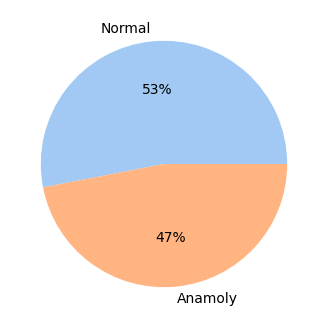

In [213]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(y_train.value_counts(), labels = ['Normal', 'Anamoly'],colors = colors, autopct='%.0f%%')

<Axes: xlabel='protocol_type', ylabel='count'>

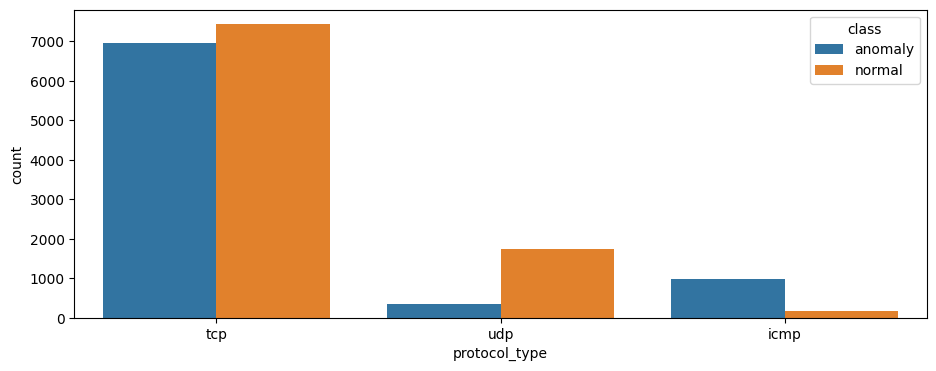

In [214]:
sns.countplot(x=x_train['protocol_type'], hue=y_train)


Almost 80% of the traffic belongs to 'tcp' and the rest to 'udp' and 'icmp'


<Axes: xlabel='flag', ylabel='count'>

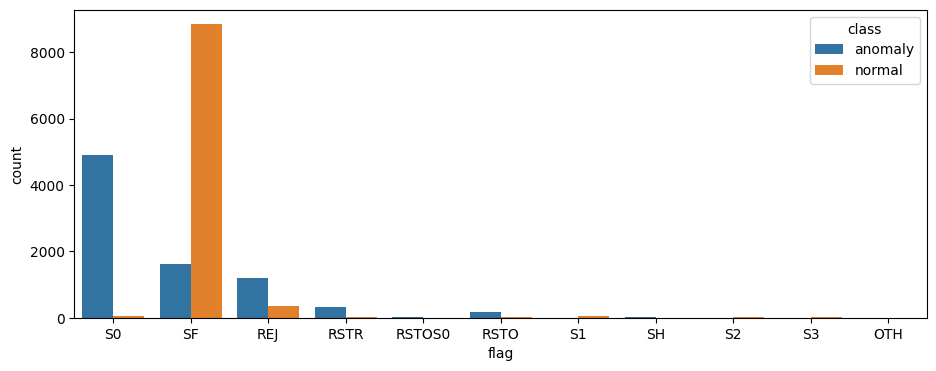

In [215]:
sns.countplot(x=x_train['flag'], hue=y_train)

* Majority of SF flagged traffic was normal 
* SO flagged traffic contributed the  majority of the anomalies



In [216]:
#ENCODING THE TARGET CLASS AS 1 IF ANOMALY ELSE 0
y_train = y_train.apply(lambda x: 1 if x=="anomaly" else 0)
y_test = y_test.apply(lambda x: 1 if x=="anomaly" else 0)

In [217]:
#CHECKING FOR CORRELATION AMONG THE FEATURES
x_train.corr().head()

<ipython-input-217-bc02b4ef7f3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train.corr().head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.101149,0.014844,-0.000848,-0.009726,-0.006061,0.007604,-0.064266,0.079122,0.043639,...,0.057614,-0.111228,-0.118165,0.271542,0.245638,-0.023170,-0.067573,-0.066581,0.195054,0.211950
src_bytes,0.101149,1.000000,0.003827,-0.000079,-0.000906,0.000470,-0.000294,-0.003849,-0.000188,-0.000402,...,-0.010246,-0.009334,-0.008359,0.001598,0.000794,-0.001916,-0.006722,-0.006559,-0.001975,0.008029
dst_bytes,0.014844,0.003827,1.000000,-0.000289,-0.003314,0.000576,0.004869,0.007707,0.028173,0.015872,...,-0.029229,-0.001401,0.022365,-0.012516,0.026250,-0.005553,-0.014012,-0.012422,-0.013738,-0.012530
land,-0.000848,-0.000079,-0.000289,1.000000,-0.000650,-0.000718,-0.000213,-0.006067,-0.000149,-0.000295,...,-0.013863,-0.007264,0.008111,-0.003334,0.020895,0.023320,0.011985,-0.002744,-0.002881,-0.002798
wrong_fragment,-0.009726,-0.000906,-0.003314,-0.000650,1.000000,-0.008233,-0.002442,-0.069578,-0.001713,-0.003382,...,0.035528,-0.039885,-0.043521,0.054336,0.040508,-0.017072,-0.050672,-0.054621,0.023679,-0.032091


<ipython-input-218-c2384dd0c47e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_train.corr(), cmap= 'RdBu', vmin = -1, vmax = 1)


<Axes: >

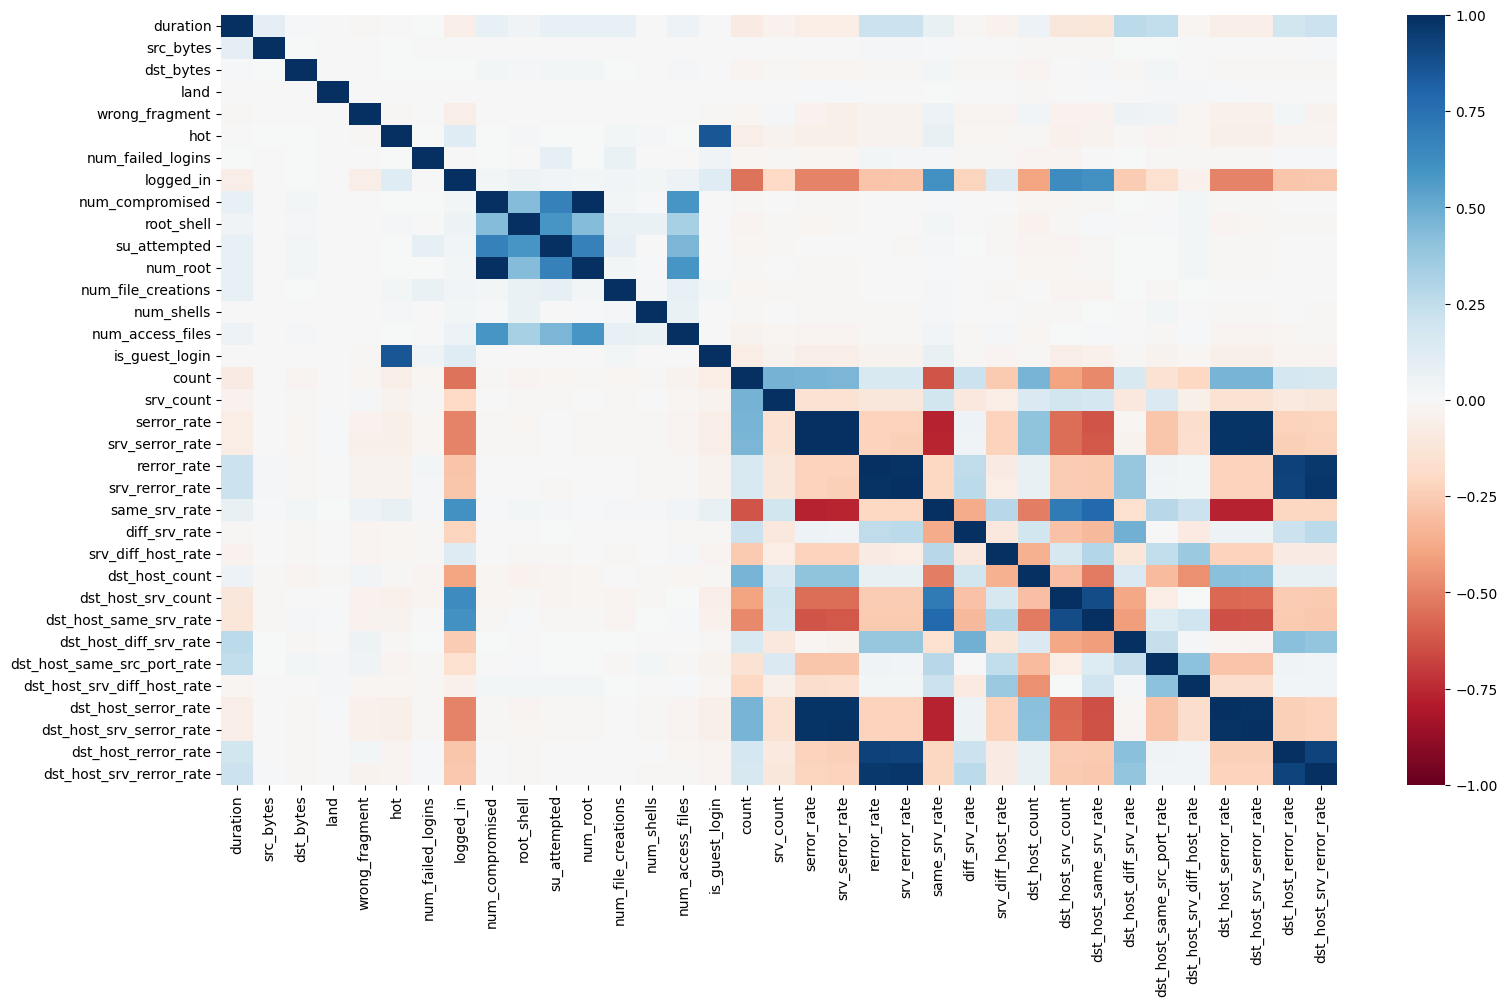

In [218]:
#PLOTTING A HEAT MAP TO SEE FOR CORRELATION
plt.figure(figsize=(18,10))
sns.heatmap(x_train.corr(), cmap= 'RdBu', vmin = -1, vmax = 1)

We see a uniform chart as we have dropped the features which aren't useful



In [219]:
#CORRELATION FOR EACH OF THE FEATURE WITH THE TARGET VARIABLE 
corr_y = x_train.corrwith(y_train).apply(abs)
corr_y

<ipython-input-219-4e05c7e13318>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_y = x_train.corrwith(y_train).apply(abs)


duration                       0.054102
src_bytes                      0.006883
dst_bytes                      0.009863
land                           0.008003
wrong_fragment                 0.091790
hot                            0.015041
num_failed_logins              0.002636
logged_in                      0.692654
num_compromised                0.016694
root_shell                     0.022317
su_attempted                   0.027026
num_root                       0.018050
num_file_creations             0.017586
num_shells                     0.014710
num_access_files               0.040716
is_guest_login                 0.041244
count                          0.580569
srv_count                      0.007352
serror_rate                    0.651269
srv_serror_rate                0.649059
rerror_rate                    0.260238
srv_rerror_rate                0.260128
same_srv_rate                  0.751566
diff_srv_rate                  0.194434
srv_diff_host_rate             0.120582


In [220]:
#CHECKING FOR FEATURES WHICH COULD HIGHLY CONTRIBUTE TO OUR ML MODEL
corr_y[corr_y>0.7]

same_srv_rate         0.751566
dst_host_srv_count    0.720780
dtype: float64



*   Low correlation for many features is a good sign here
*   Correlation can (sometimes) indicate the presence of a causal relationship
* Multicollinearity can lead to skewed or misleading results



In [221]:
#ENCODING CATEGORICAL DATA (using custom encoder found on web)
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [222]:
#USING THE CUSTOM FUNCTION TO ENCODE THE CATEGORICAL COLUMNS 
le = LabelEncoderExt()

for col in x_train.select_dtypes("object"):
  le.fit(x_train[col])
  x_train[col] = le.transform(x_train[col])
  x_test[col] = le.transform(x_test[col])
  latest_x_test[col] = le.transform(latest_x_test[col])

In [223]:
#NORMALIZE NUMERIC DATA
scaler = StandardScaler()
cols = x_train.columns

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = cols)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = cols)

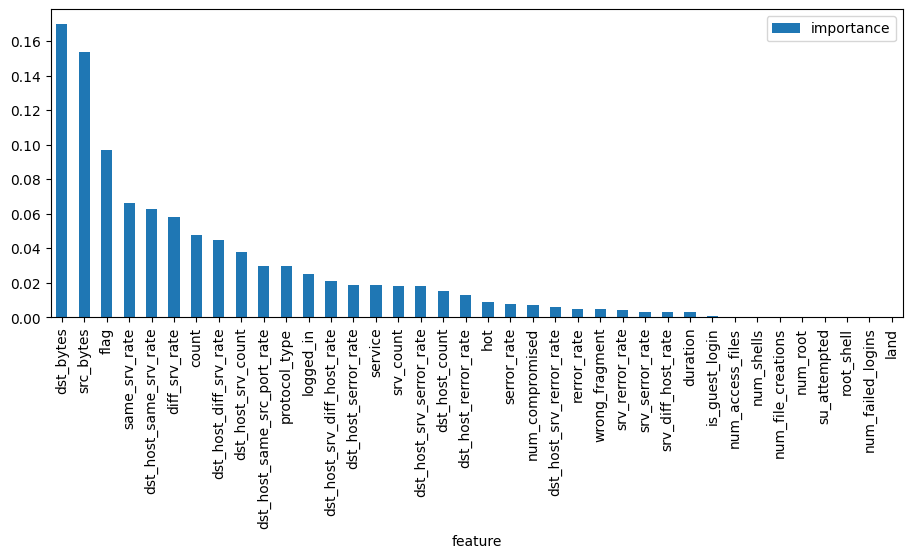

In [224]:
#FEATURE SELECTION
rfc = RandomForestClassifier();

rfc.fit(x_train_scaled, y_train);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train_scaled.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
#USING RANDOM FOREST CLASSIFIER ON THE TRAINING SET AND PLOTTING THE IMPORTANCE OF THE FEATURES 
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [225]:
#USING RFE FOR FEATURE EXTRACTION
estimator = RandomForestClassifier()
selector = RFE(estimator)
selector.fit(x_train_scaled, y_train)

X_train_scaled = selector.transform(x_train_scaled)
X_test_scaled = selector.transform(x_test_scaled)

In [226]:
#MODEL FIT
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_train_scaled, y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_train_scaled, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train_scaled, y_train)

BernoulliNB()

In [227]:
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, x_train_scaled, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(x_train_scaled))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train_scaled))
    classification = metrics.classification_report(y_train, v.predict(x_train_scaled))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.896789994122058

Model Accuracy:
 0.8967902914823637

Confusion matrix:
 [[8926  427]
 [1393 6888]]

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      9353
           1       0.94      0.83      0.88      8281

    accuracy                           0.90     17634
   macro avg       0.90      0.89      0.90     17634
weighted avg       0.90      0.90      0.90     17634



============================== KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9918340015151456

Model Accuracy:
 0.9943291368946353

Confusion matrix:
 [[9311   42]
 [  58 8223]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9353
           1       0.99      0.99      0.99

In [228]:
#MODEL PERFORMANCE ON TEST DATA
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(x_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(x_test))
    classification = metrics.classification_report(y_test, v.predict(x_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.889521037311458

Confusion matrix:
 [[3987  109]
 [ 726 2736]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      4096
           1       0.96      0.79      0.87      3462

    accuracy                           0.89      7558
   macro avg       0.90      0.88      0.89      7558
weighted avg       0.90      0.89      0.89      7558



============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.25456469965599365

Confusion matrix:
 [[ 523 3573]
 [2061 1401]]

Classification report:
               precision    recall  f1-score   support

           0       0.20      0.13      0.16      4096
           1       0.28      0.40      0.33      3462

    accuracy                           0.25      7558
   macro avg       0.24      

In [229]:
#CALCULATING THE PERCENTAGE OF INCORRENT PREDICTIONS OF THE MODELS
from sklearn.metrics import hamming_loss

for i, v in models:
    y_pred = v.predict(x_test)
    h_loss = hamming_loss(y_test, y_pred)

    print()
    print('============================== {} Percentage of INCORRECT Predictions =============================='.format(i))
    print()
    print ("Hamming Loss:" ,h_loss*100)
    print()        


============================== Naive Baye Classifier Percentage of INCORRECT Predictions ==============================

Hamming Loss: 11.047896268854194


============================== KNeighborsClassifier Percentage of INCORRECT Predictions ==============================

Hamming Loss: 74.54353003440065


============================== LogisticRegression Percentage of INCORRECT Predictions ==============================

Hamming Loss: 32.93199259063244



In [230]:
 #MODEL PERFORMANCE ON TEST DATA
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(x_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(x_test))
    classification = metrics.classification_report(y_test, v.predict(x_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.889521037311458

Confusion matrix:
 [[3987  109]
 [ 726 2736]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      4096
           1       0.96      0.79      0.87      3462

    accuracy                           0.89      7558
   macro avg       0.90      0.88      0.89      7558
weighted avg       0.90      0.89      0.89      7558



============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.25456469965599365

Confusion matrix:
 [[ 523 3573]
 [2061 1401]]

Classification report:
               precision    recall  f1-score   support

           0       0.20      0.13      0.16      4096
           1       0.28      0.40      0.33      3462

    accuracy                           0.25      7558
   macro avg       0.24      

In [231]:
x_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
2470,0,2,47,5,0,0,0,0,0,0,...,255,11,0.04,0.07,0.00,0.00,1.0,1.0,0.0,0.0
21969,0,2,47,5,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,1.0,1.0,0.0,0.0
242,0,2,65,5,0,0,0,0,0,0,...,255,3,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0
2257,0,2,52,9,1195,331,0,0,0,0,...,77,122,0.73,0.04,0.01,0.02,0.0,0.0,0.0,0.0
20415,12,2,20,9,7045,0,0,0,0,0,...,5,35,1.00,0.00,1.00,0.14,0.0,0.0,0.0,0.0


In [232]:
latest_test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,11


In [233]:
latest_test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,11


In [234]:
latest_y_test.value_counts()

1    12833
0     9711
Name: attack, dtype: int64

In [235]:
 #MODEL PERFORMANCE ON LATEST DATA
for i, v in models:
    accuracy = metrics.accuracy_score(latest_y_test, v.predict(latest_x_test))
    confusion_matrix = metrics.confusion_matrix(latest_y_test, v.predict(latest_x_test))
    classification = metrics.classification_report(latest_y_test, v.predict(latest_x_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.7523953158268275

Confusion matrix:
 [[9587  124]
 [5458 7375]]

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.77      9711
           1       0.98      0.57      0.73     12833

    accuracy                           0.75     22544
   macro avg       0.81      0.78      0.75     22544
weighted avg       0.83      0.75      0.75     22544



============================== KNeighborsClassifier Model Test Results ==============================

Model Accuracy:
 0.3530872959545777

Confusion matrix:
 [[ 785 8926]
 [5658 7175]]

Classification report:
               precision    recall  f1-score   support

           0       0.12      0.08      0.10      9711
           1       0.45      0.56      0.50     12833

    accuracy                           0.35     22544
   macro avg       0.28      